<a href="https://colab.research.google.com/github/skumarudel/DSPS_SKumar/blob/master/HW2/CentralLimitTheorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by Sajan Kumar for DSPS 2021

In [1]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
import numpy as np
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
import scipy.stats as st
%pylab inline
import seaborn
seaborn.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


/Users/home/miniconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For distribution plot the sample mean of each sample (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
-  Extra Credit (required for 661 students): FIT a gaussian to the distribution of means. i.e. to the height of the bins if a histogram of sample means           

## choose which distributions to use 

In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']

## Just for an example I am trying to plot probability and cumulative probability of chi2 distribution using scipy package 

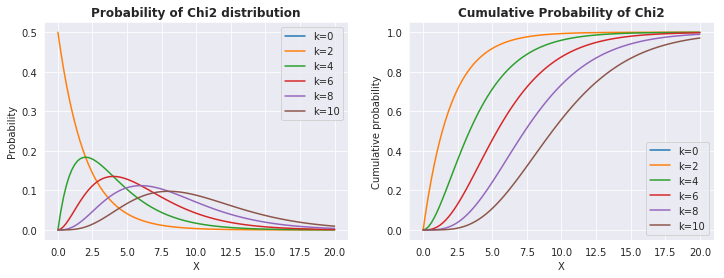

In [3]:
fig,ax = pl.subplots(1,2, figsize=(12,4))
x = np.linspace(0,20,100)
for i in range(0,12,2):
  distribution = st.chi2(i)  # define the chi2 distribution with degree of freedom 0,2,4,6,8,10. Mean is same as dof
  ax[0].plot(x, distribution.pdf(x), label="k={}".format(i))
  ax[1].plot(x, distribution.cdf(x), label="k={}".format(i))

ax[0].legend()
ax[0].set_xlabel('X')
ax[0].set_ylabel('Probability');
ax[0].set_title('Probability of Chi2 distribution', fontweight='bold')
ax[1].legend()
ax[1].set_xlabel('X')
ax[1].set_ylabel('Cumulative probability')
ax[1].set_title('Cumulative Probability of Chi2', fontweight='bold');

For chi2 the parameter is *k* degrees of freedom. the mean is mean=*k*, the variance is 2*k*

# Then lets look at the numpy random sampling package to see how I create the distribution

In [4]:
# the chi sq distribution takes the number of degrees of freedom, 
# which luckily is the same as the mean!
df = 10

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution of 100 elements

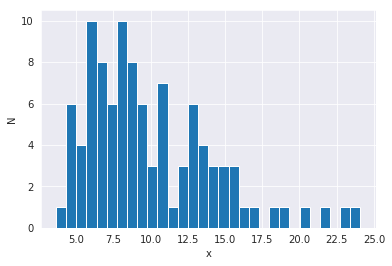

In [5]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(456)
# prepare a container for all the distribution: 
# a dictionary so you can call each family of distribution by "key" 
mydists = {}
# mydists is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
mydists['chisq'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
mydists['chisq'][100] = np.random.chisquare(df, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it: 
#             an array of 100 elements by the key 100
pl.hist(mydists['chisq'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square distribution with  10 degrees of freedom. 

In [6]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(mydists['chisq'][100].mean(), mydists['chisq'][100].std()))

Chisq mean: 10.01, standard deviation: 4.28


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we discussed in class). Here are some tricks to create the distribution siz

In [7]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


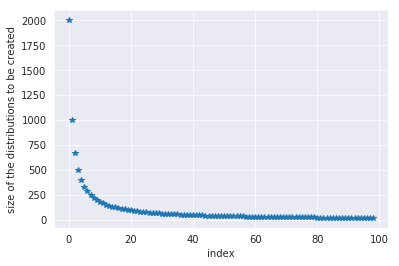

In [8]:
pl.plot(mysize, '*')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

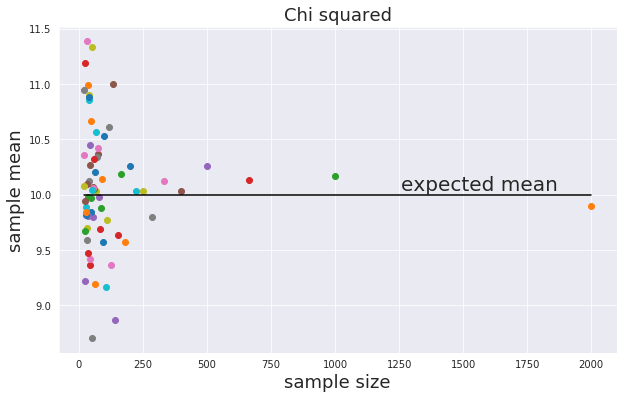

In [9]:
# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:
    mydists['chisq'][n] = np.random.chisquare(df, size = n) #all distributions have mean=df=10
    
# save the means for plotting later    

mydists['chisq']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['chisq']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['chisq']['means'][nn] = mydists['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydists['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Chi squared', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 10, "expected mean", 
                  va="bottom", fontsize=20);

### Figure 2: [describe what you see and how it relates to the law of large numbers]


---

**Answer:** Above Figure 2 shows that as the sample size increases, the sample mean is getting closer and closer to the population mean.


---







## Plotting standard deviation as well

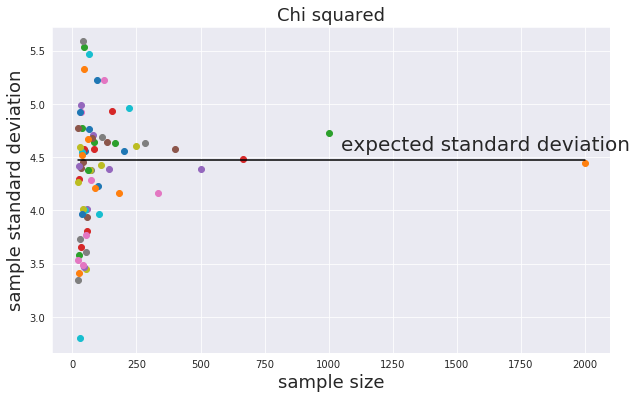

In [10]:
# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:
    mydists['chisq'][n] = np.random.chisquare(df, size = n) #all distributions have mean=df=10
    
# save the means for plotting later    

mydists['chisq']['std'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['chisq']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['chisq']['std'][nn] = mydists['chisq'][nn].std()
        #and plot it
        axchisq_mu_n.plot(nn, mydists['chisq']['std'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample standard deviation', fontsize=18)
axchisq_mu_n.set_title('Chi squared', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [np.sqrt(df*2), np.sqrt(df*2)], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .5, np.sqrt(df*2)+0.05, "expected standard deviation", 
                  va="bottom", fontsize=20);

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

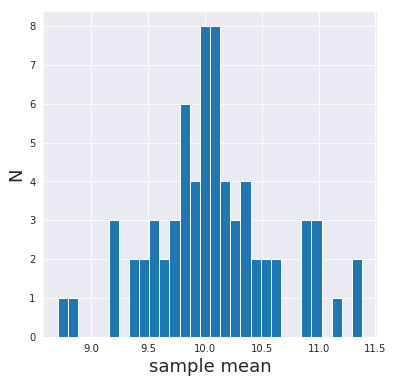

In [11]:
allmeans = list(mydists['chisq']['means'].values())

pl.figure(figsize=(6, 6))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);



---


**Answer:** Above plot shows the distributions of sample mean of different sample size drawn from chisq distribution. The above distribution looks similar to gaussian distributon which is what we expect. The result of central limit theorm


---






### Code to hold the required data from all four distributions in one dictionary

In [12]:
np.random.seed(444)
parameter_value = 5   # this can be mean, rate, throws for normal, poisson and binomial distributions respectively
list_of_dist = ['binomial', 'poisson', 'normal', 'exponential']
dict_of_dist = {}
for d in list_of_dist:
  dict_of_dist[d] = {}
for d in dict_of_dist:
  dict_of_dist[d]['mean'] = {}

for n in mysize:
  for d in dict_of_dist:
    if d == 'binomial':
      data = np.random.binomial(n=parameter_value, p=0.5, size=n)
      dict_of_dist[d][n] = data
      dict_of_dist[d]['mean'][n] = data.mean()
    if d == 'poisson':
      data = np.random.poisson(lam=parameter_value, size=n)
      dict_of_dist[d][n] = data
      dict_of_dist[d]['mean'][n] = data.mean()

    if d == 'normal':
      data = np.random.normal(loc=parameter_value, scale=1.0, size=n)
      dict_of_dist[d][n] = data
      dict_of_dist[d]['mean'][n] = data.mean()

    if d == 'exponential':
      data = np.random.exponential(scale=parameter_value, size=n)
      dict_of_dist[d][n] = data
      dict_of_dist[d]['mean'][n] = data.mean()


      

# Do it for the Normal, Poisson, Binomial and exponential distributions

### Plotting all four distributions in one figure, divided into 2x2

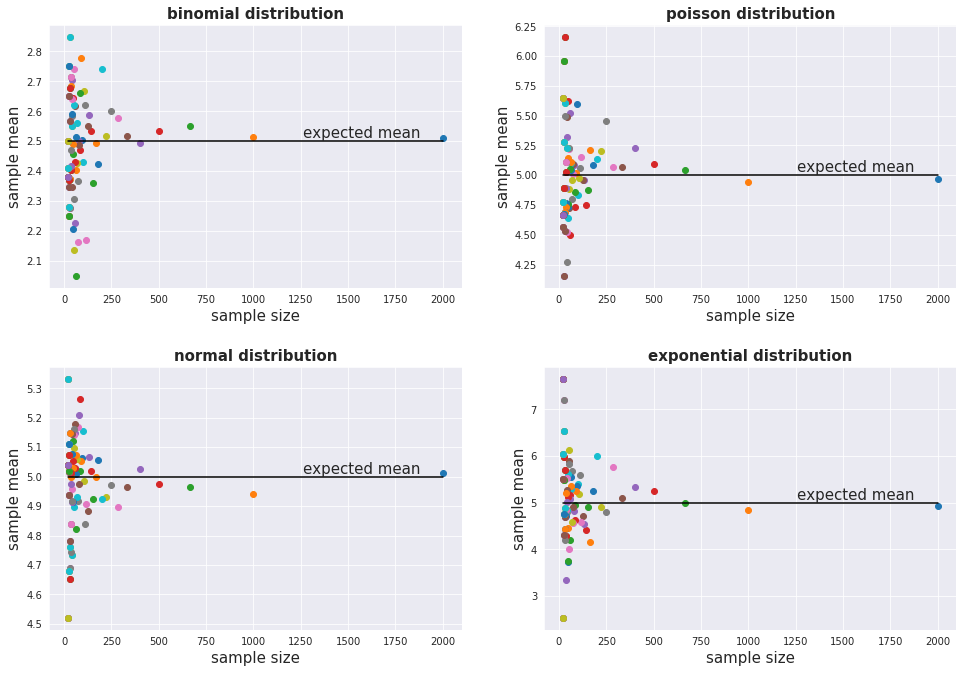

In [13]:
fig, axes = pl.subplots(2,2,figsize=(18,12))
ax = axes.flatten()
for i in range(len(ax)):
  for nn in mysize:
    ax[i].plot(nn, dict_of_dist[list_of_dist[i]]['mean'][nn], 'o')

  ax[i].set_xlabel('sample size', fontsize=15)
  ax[i].set_ylabel('sample mean', fontsize=15)
  ax[i].set_title("{} distribution".format(list_of_dist[i]), fontsize=15, fontweight='bold')
  if list_of_dist[i] == 'binomial':
    ax[i].plot([min(mysize), max(mysize)], [parameter_value*0.5, parameter_value*0.5], 'k')
    ax[i].text(ax[i].get_xlim()[1] * .6, parameter_value*0.5, "expected mean", 
                    va="bottom", fontsize=15);
  else:
    ax[i].plot([min(mysize), max(mysize)], [parameter_value, parameter_value], 'k')
    ax[i].text(ax[i].get_xlim()[1] * .6, parameter_value, "expected mean", 
                    va="bottom", fontsize=15);


pl.subplots_adjust(left=0.15,
                    bottom=0.15, 
                    right=0.85, 
                    top=0.85, 
                    wspace=0.2, 
                    hspace=0.3)
  

### Note that in the above figure, the expected mean in binomial distribution is around 2.5. This is becasue I choose probability of success of 0.5. As the mean in binomial distrbution is n*p, this will result in $5\times0.5 = 2.5$. For the rest of the distributions, the expected mean is 5

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

###Here I define a loglikehood function to fit the data to the gaussian model and then find the parameters of the gaussian distribution

## Parameter estimation using unbinned loglikehood method

Here we will use the classical maximum likehood approach to find the parameters of a model given the data. Here we will assume our model as Gaussian function, since we are fitting the data of sample means which according to central limit theorm follow gaussain distribution

![1](https://raw.githubusercontent.com/skumarudel/DSPS_SKumar/master/HW2/LogLikehoodExplanation.png)

In [14]:
def unbinned_loglikelihood_gaussian(param, data):
  """unbinned loglikehood function
  The function is minimized which will give us most likely value of the parameters of the model given the data
  Only input needed is data from sample means
  """
  x = data
  mean, sigma = param[0], param[1]
  ll = 0 # intilize loglikehood function
  z = (x - mean)**2
  A = np.log(1 / np.sqrt(2 * np.pi * sigma**2))
  B = (-1*z) / (2 * sigma**2)
  ll +=np.sum(B)
  ll += len(x) * A
  ll = -2 * ll
  return ll

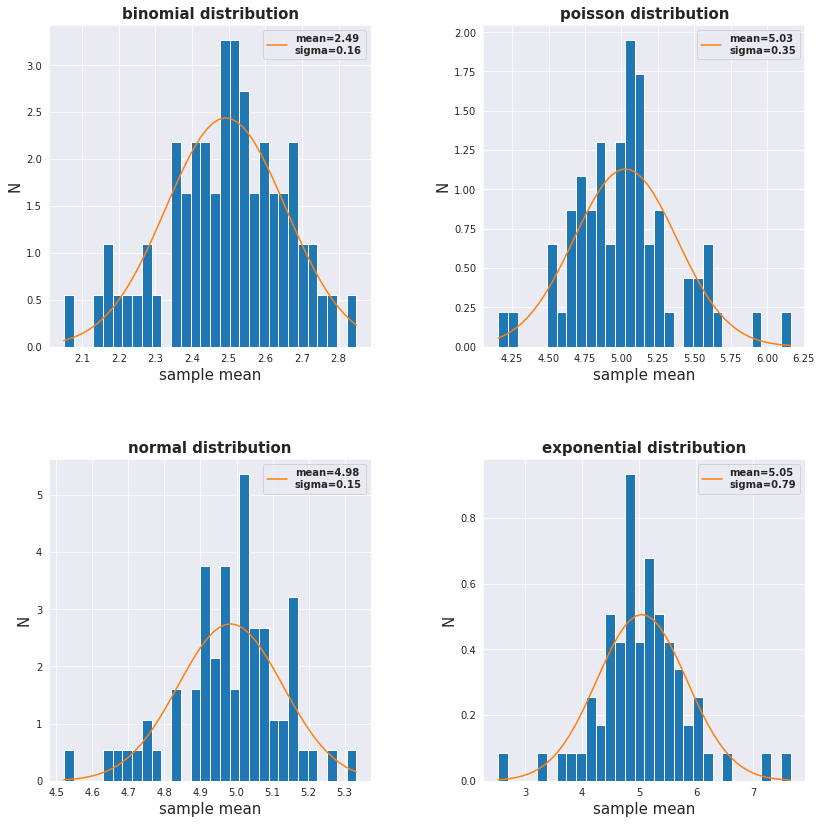

In [15]:
fig, axes = pl.subplots(2,2,figsize=(15,15))
ax = axes.flatten()
for i in range(len(ax)):
    data = list(dict_of_dist[list_of_dist[i]]['mean'].values())
    mf = minimize(unbinned_loglikelihood_gaussian, x0=[3,1], args=data)
    mean, sigma = mf.x[0], mf.x[1]
    ax[i].hist(data, bins=30, density=True)
    x = np.linspace(min(data), max(data),50)
    ax[i].plot(x, st.norm.pdf(x, mean,sigma), label="mean={:.2f}\nsigma={:.2f}".format(mean,sigma))

    ax[i].set_xlabel('sample mean', fontsize=15)
    ax[i].set_ylabel('N', fontsize=15)
    ax[i].set_title("{} distribution".format(list_of_dist[i]), fontsize=15, fontweight='bold')
    ax[i].legend(prop=dict(weight='bold'))

pl.subplots_adjust(left=0.15,
                    bottom=0.15, 
                    right=0.85, 
                    top=0.85, 
                    wspace=0.35, 
                    hspace=0.35)
  



---


**Answer:**Proof of concept of Central limit theorm which states that no matter what is the shape of original population distribution (uniform, bionomial, poisson etc), if you draw samples from that population and take mean of all the samples and plot those means, it should result in a gaussain distribution.


---






## Same plots using scipy curve fit

In [16]:
def gaus_pdf(x,norm,mu,sigma):
  """Gaussian function
  The functional form is given by norm * exp (-1/2 ((x-mu) / sigma)**2)
  Here the parameter mu and sigma define the mean and the standard deviation of the distribution
  """
  return norm * np.exp(-(x-mu)**2 / 2. / sigma**2)


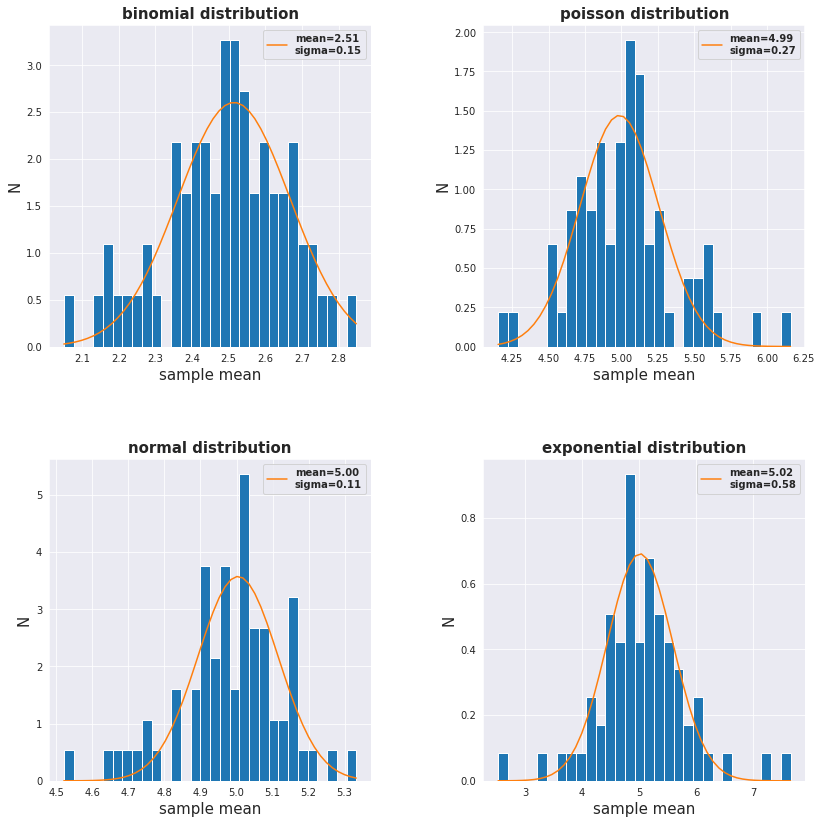

In [17]:
fig, axes = pl.subplots(2,2,figsize=(15,15))
ax = axes.flatten()
for i in range(len(ax)):
    data = list(dict_of_dist[list_of_dist[i]]['mean'].values())
    counts, bins = np.histogram(data,bins=30)
    bin_center = (bins[:-1] + bins[1:])/2
    popt, pcov = curve_fit(gaus_pdf, bin_center, counts)
    mean, sigma = popt[1], popt[2]
    ax[i].hist(data, bins=30, density=True)
    x = np.linspace(min(data), max(data),50)
    ax[i].plot(x, st.norm.pdf(x, mean,sigma), label="mean={:.2f}\nsigma={:.2f}".format(mean,sigma))

    ax[i].set_xlabel('sample mean', fontsize=15)
    ax[i].set_ylabel('N', fontsize=15)
    ax[i].set_title("{} distribution".format(list_of_dist[i]), fontsize=15, fontweight='bold')
    ax[i].legend(prop=dict(weight='bold'))

pl.subplots_adjust(left=0.15,
                    bottom=0.15, 
                    right=0.85, 
                    top=0.85, 
                    wspace=0.35, 
                    hspace=0.35)

### Mean and sigma calculated from two different methods (likelihood function and scipy curve fit) agree with each other

--- 
<h1 style="color:red"> Awesome !</h1>
